# **FB-31 Vasalatii Anton, Task 1** 
___
## ***Dataset*** 
**Source**: Chen, S. (2015). Beijing PM2.5 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JS49.

**General**: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.  

**Subject Area**: Climate and Environment  

**Associated Tasks**:  Regression

**Dataset Characteristics**: Multivariate, Time-Series  

**Instances**: 43824  

**Columns count**: 13 

**Missing values**: Yes  

**Additional info**: The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as "NA".
___
### **Variables info**
**No**: row number

**year**: year of data in this row

**month**: month of data in this row

**day**: day of data in this row

**hour**: hour of data in this row

**pm2.5**: PM2.5 concentration

**DEWP**: Dew Point

**TEMP**: Temperature

**PRES**: Pressure

**cbwd**: Combined wind direction

**Iws**: Cumulated wind speed  

**Is**: Cumulated hours of snow

**Ir**: Cumulated hours of rain  
___

**Setup imports**

In [496]:
import os
from colorama import Fore, Style
import pandas as pd
import tabulate
from matplotlib import pyplot as plt

**Additional functions that use python-tabulate and colorama to make output beautiful** 

In [497]:
def print_df(frame):
    print(Fore.LIGHTCYAN_EX + tabulate.tabulate(frame, headers='keys', tablefmt="heavy_grid", showindex=False) + Style.RESET_ALL)

In [498]:
def print_delimiter():
    print(Fore.LIGHTMAGENTA_EX+"_"*135+"\n"+Style.RESET_ALL)

In [499]:
def print_double_delimiter():
    print(Fore.LIGHTYELLOW_EX+"_"*135+"\n"+"_"*135+Style.RESET_ALL)

In [500]:
def print_green_cyan_colored_pair(tag, value, indentation=''):
    print(indentation + Fore.LIGHTGREEN_EX + tag + " " + Fore.CYAN + str(value) + Style.RESET_ALL)

In [501]:
def outer_def_delimiters(func):
    print_delimiter()
    func()
    print_delimiter()

In [502]:
def print_error(error):
    print(Fore.RED + error + Style.RESET_ALL)

**Parsing data with Pandas**  
Here read_data_with_pd function is used to retrieve info from downloaded csv and store it into DataFrame structure.  
Also general info is printed and basic data cleaning by removing rows with NaNs is done.

In [503]:
def read_data_with_pd(path):
    if os.path.exists(path):
        headers = ['No', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'DEWP', 'TEMP', 'PRES', 'CBWD', 'IWS','IS','IR']
        df = pd.read_csv(path,delimiter=",",index_col=False, header=1, na_values=['NA'], names=headers)

        column_na = df.isnull().sum()

        outer_def_delimiters(
            lambda : print(Fore.GREEN+"How many NaNs by column count:" + "\n" + Fore.LIGHTBLUE_EX + column_na.__str__()+Style.NORMAL)
        )
        if column_na.sum() > 0:
            df.dropna(inplace=True) 

        print_df(df.head())
        print_delimiter()
        print_df(df.tail())

        print_double_delimiter()

        return df
    else:
        print_error(f"{path} does not exist")
        return None

_______________________________________________________________________________________________________________________________________

How many NaNs by column count:
No          0
Year        0
Month       0
Day         0
Hour        0
PM2.5    2066
DEWP        0
TEMP        0
PRES        0
CBWD        0
IWS         0
IS          0
IR          0
dtype: int64
_______________________________________________________________________________________________________________________________________

┏━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┓
┃   No ┃   Year ┃   Month ┃   Day ┃   Hour ┃   PM2.5 ┃   DEWP ┃   TEMP ┃   PRES ┃ CBWD   ┃   IWS ┃   IS ┃   IR ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━╋━━━━━━┫
┃   25 ┃   2010 ┃       1 ┃     2 ┃      0 ┃     129 ┃    -16 ┃     -4 ┃   1020 ┃ SE     ┃  1.79 ┃    0 ┃    0 ┃
┣━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━╋━━━━━━━━╋━━━━

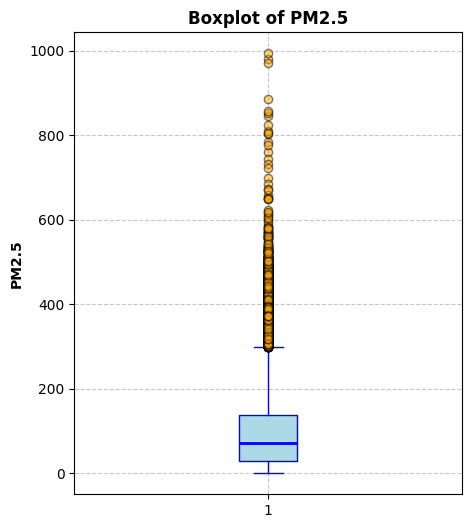

In [504]:
data_file_name = "beijing_pm_2_5.csv"
df = read_data_with_pd(data_file_name)

plt.figure(figsize=(5, 6))
plt.boxplot(df['PM2.5'], vert=True, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="blue", linewidth=2),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"),
            flierprops=dict(markerfacecolor="orange", marker="o", markersize=6, alpha=0.5))

plt.title("Boxplot of PM2.5", fontweight="bold")
plt.ylabel("PM2.5", fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


**Remove some outliers and save modified df in separate csv**

In [505]:
df = df[df['PM2.5']<=650]
df.to_csv(data_file_name.split('.')[0]+'_cleared.csv', index=False)

**Function created to compare original data with modified via hist plot**

In [506]:
def compare_distributions_after_df_modifing(df, md_df, column, new_column, md_title):
    _, ax=plt.subplots(1, 2, figsize=(15, 3))
    ax[0].hist(df[column], bins=30, density=False, alpha=0.6, color="C0", edgecolor="black")
    ax[0].set_title("Original data", fontweight='bold')
    ax[0].set_ylabel("Amount", fontweight='bold')
    ax[0].set_xlabel(column, fontweight='bold')
    ax[0].grid(True, linestyle='--', alpha=0.7)

    ax[1].hist(md_df[new_column], bins=30, density=False, alpha=0.6, color="C0", edgecolor="black")
    ax[1].set_title(md_title, fontweight='bold')
    ax[1].set_ylabel("Amount", fontweight='bold')
    ax[1].set_xlabel(new_column, fontweight='bold')
    ax[1].grid(True, linestyle='--', alpha=0.7)
    plt.show()

**Calculate, print and save in separate file next values: mean, median, trimmed mean, variance, standart deviation, median absolute deviation, mean absolute deviation**

In [507]:
pm_vals = df['PM2.5']

pm_mean = pm_vals.mean()
trim_amount = round(len(pm_vals) * 0.001)
pm_trimmed_mean = pm_vals.sort_values(ascending=True)[trim_amount:-trim_amount].mean()
pm_median = pm_vals.median()
pm_variance = ((pm_vals - pm_mean) ** 2).sum() / (len(pm_vals) - 1)
pm_standard_deviation = pm_variance ** 0.5
mean_abs_deviation = (pm_vals - pm_mean).abs().mean()
median_abs_deviation = (pm_vals - pm_median).abs().median()

stats_dict = {
    "Mean": pm_mean,
    "Trimmed mean": pm_trimmed_mean,
    "Median": pm_median,
    "Variance": pm_variance,
    "Standard deviation": pm_standard_deviation,
    "Mean absolute deviation": mean_abs_deviation,
    "Median absolute deviation": median_abs_deviation,
}

with open("calc_values.txt","w") as f:
    for k,v in stats_dict.items():
        print_green_cyan_colored_pair(f"{k}:",v)
        f.write(f"{k}: {v}\n")


Mean: 98.21860398245992
Trimmed mean: 97.83608249897956
Median: 72.0
Variance: 8201.29000948596
Standard deviation: 90.56097398706554
Mean absolute deviation: 68.37316456596182
Median absolute deviation: 49.0


**Min-Max normalization**

In [508]:
df_normalized = pd.DataFrame()

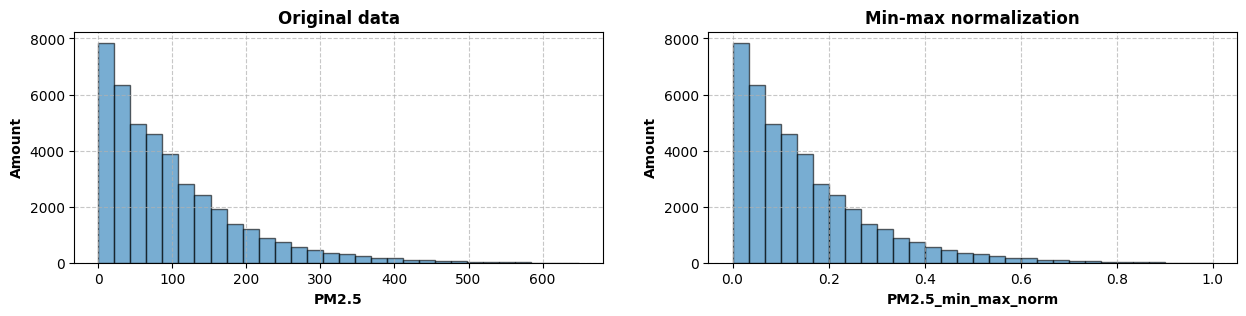

In [509]:
pm_min_val = pm_vals.min()
pm_max_val = pm_vals.max()
df_normalized['PM2.5_min_max_norm'] = (pm_vals - pm_min_val)/(pm_max_val-pm_min_val)
compare_distributions_after_df_modifing(df, df_normalized, 'PM2.5', 'PM2.5_min_max_norm', 'Min-max normalization')

**Mean normalization**

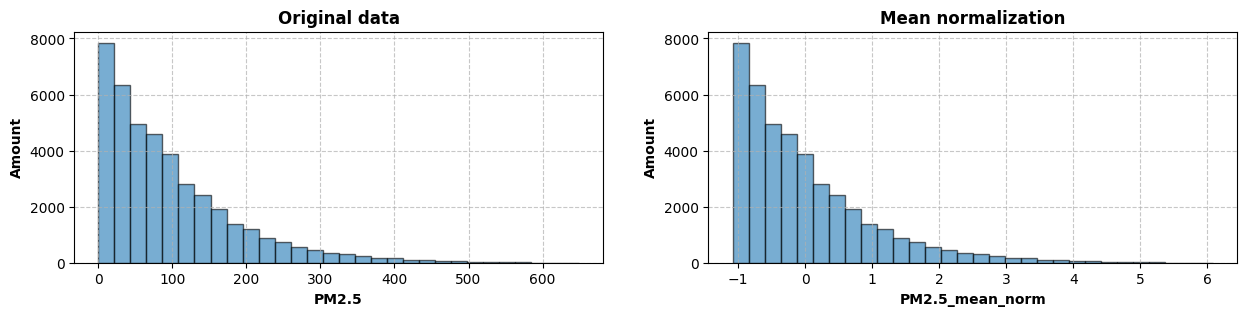

In [510]:
df_normalized['PM2.5_mean_norm'] = (pm_vals - pm_mean)/pm_standard_deviation
compare_distributions_after_df_modifing(df, df_normalized, 'PM2.5', 'PM2.5_mean_norm', 'Mean normalization')

**Save dataframe with normalized values into separate csv**

In [511]:
df_normalized.to_csv(data_file_name.split('.')[0]+'_normalized.csv', index=False)

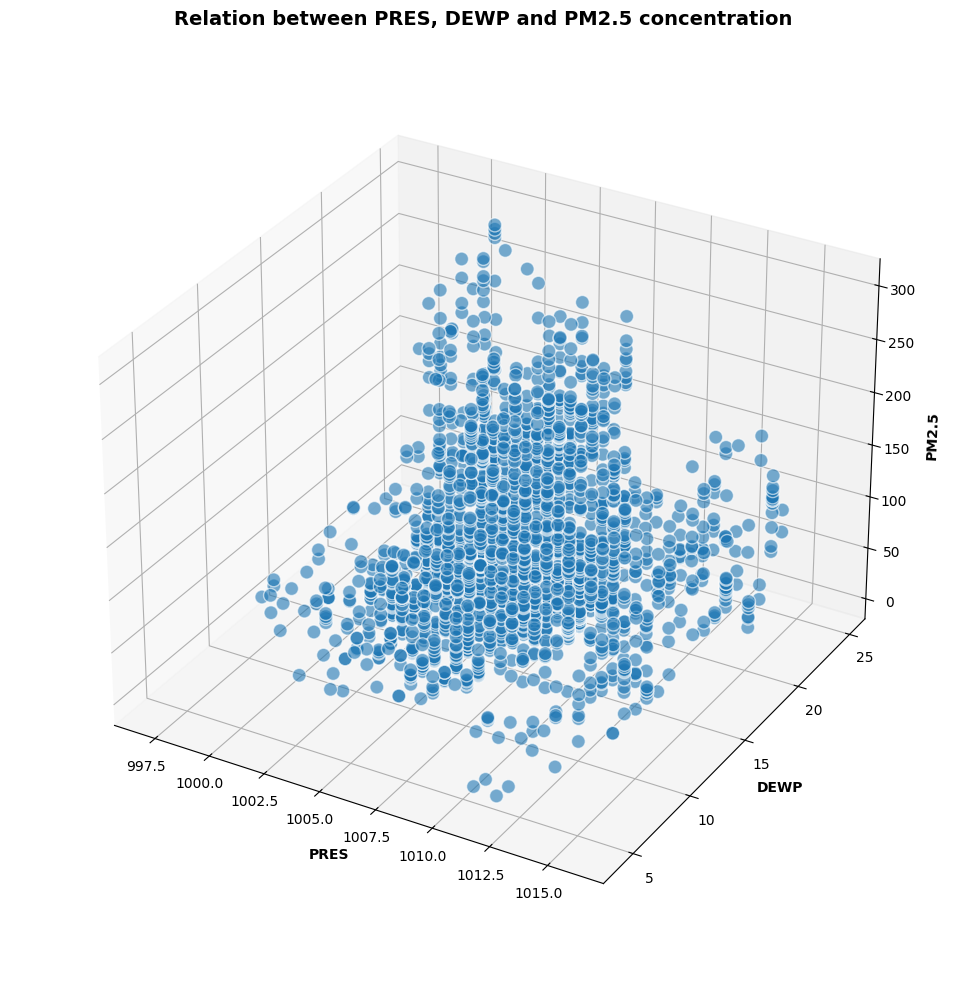

In [512]:
june_2014_data = df[(df['Year']==2014) & (df['Month'].isin([6,7,8]))]

fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot(111, projection='3d')

first = 'PRES'
second = 'DEWP'
third ='PM2.5'

xs = june_2014_data[first]
ys = june_2014_data[second]
zs = june_2014_data[third]
ax.scatter(xs, ys, zs, s=100, alpha=0.6, edgecolors='w')

ax.set_xlabel(first, fontweight='bold',labelpad=8)
ax.set_ylabel(second, fontweight='bold',labelpad=8)
ax.set_zlabel(third, fontweight='bold',labelpad=8)
ax.set_box_aspect(None, zoom=0.92)
ax.set_title(f"Relation between {first}, {second} and {third} concentration",fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()